In [1]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
with open('roman_reproduce.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_label'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 1416 pickle(s) in /data/bwedig/mejiro/roman_reproduce/03


In [4]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

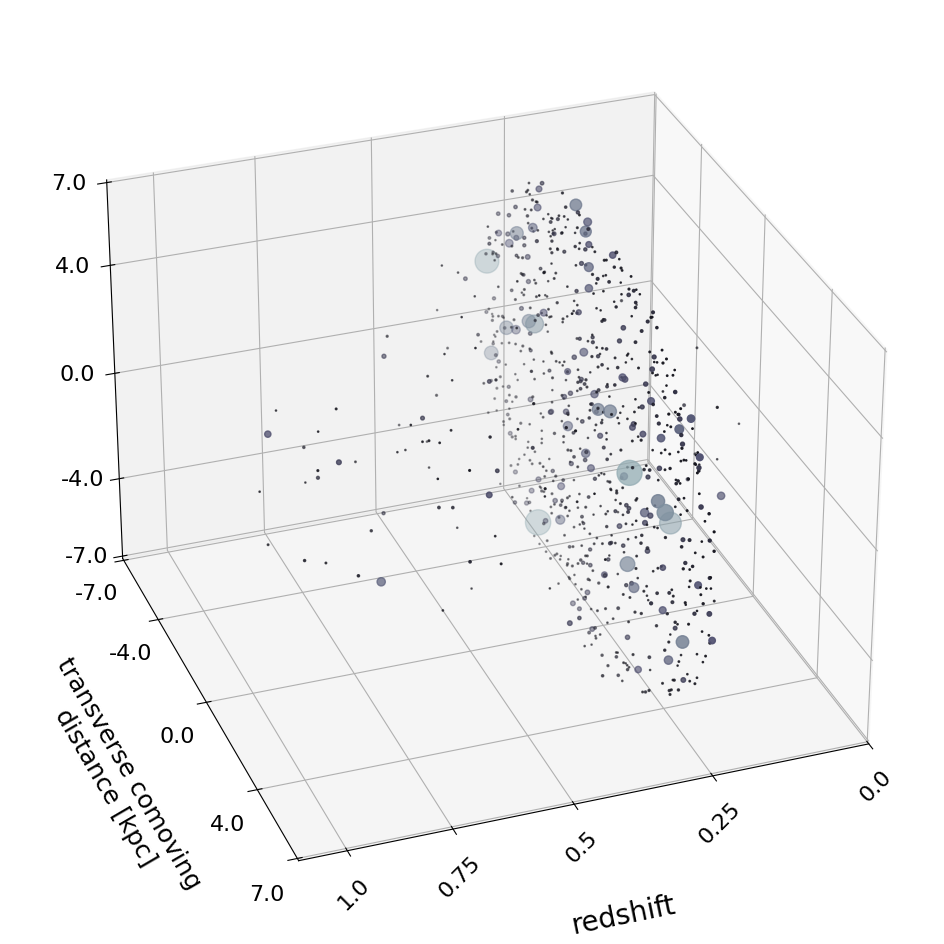

In [5]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

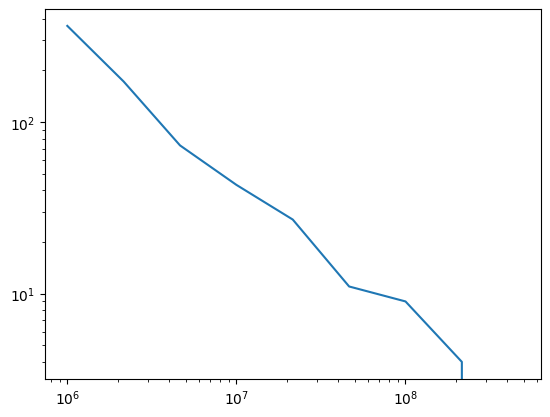

In [6]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.show()

In [7]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 4.37e+08 Msun

{'_args': {},
 '_c': 5.7532375601712635,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f5f17748040>,
 '_kwargs_lenstronomy': [{'Rs': 0.2925389486,
                          'alpha_Rs': 0.0007831256102180266,
                          'center_x': -0.6987,
                          'center_y': -1.0897,
                          'r_trunc': 0.011817540165987933}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f5f17723d00>,
 '_mbound_galacticus_definition': 441425.3455338015,
 '_nfw_params': [16875441.704739235, 1.248809833110319, 7.184699637361494],
 '_profile_args': (5.7532375601712635, 0.05044515653404284),
 '_rescale_norm': 0.28215373147114836,
 '_rescaled_once': True,
 '_time_since_infall': 7.612529754421546,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationGalacticus object at 0x7f5f177483d0>,
 '_z_infall': 2.2242898302602008,
 '_zeval': 2.2242898302602008,
 'fixed_position': F

In [11]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} lens(es) in {data_dir}')

Found 1416 lens(es) in /data/bwedig/mejiro/roman_reproduce/03


In [12]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

5 failed out of 1416 systems, 0.35 percent


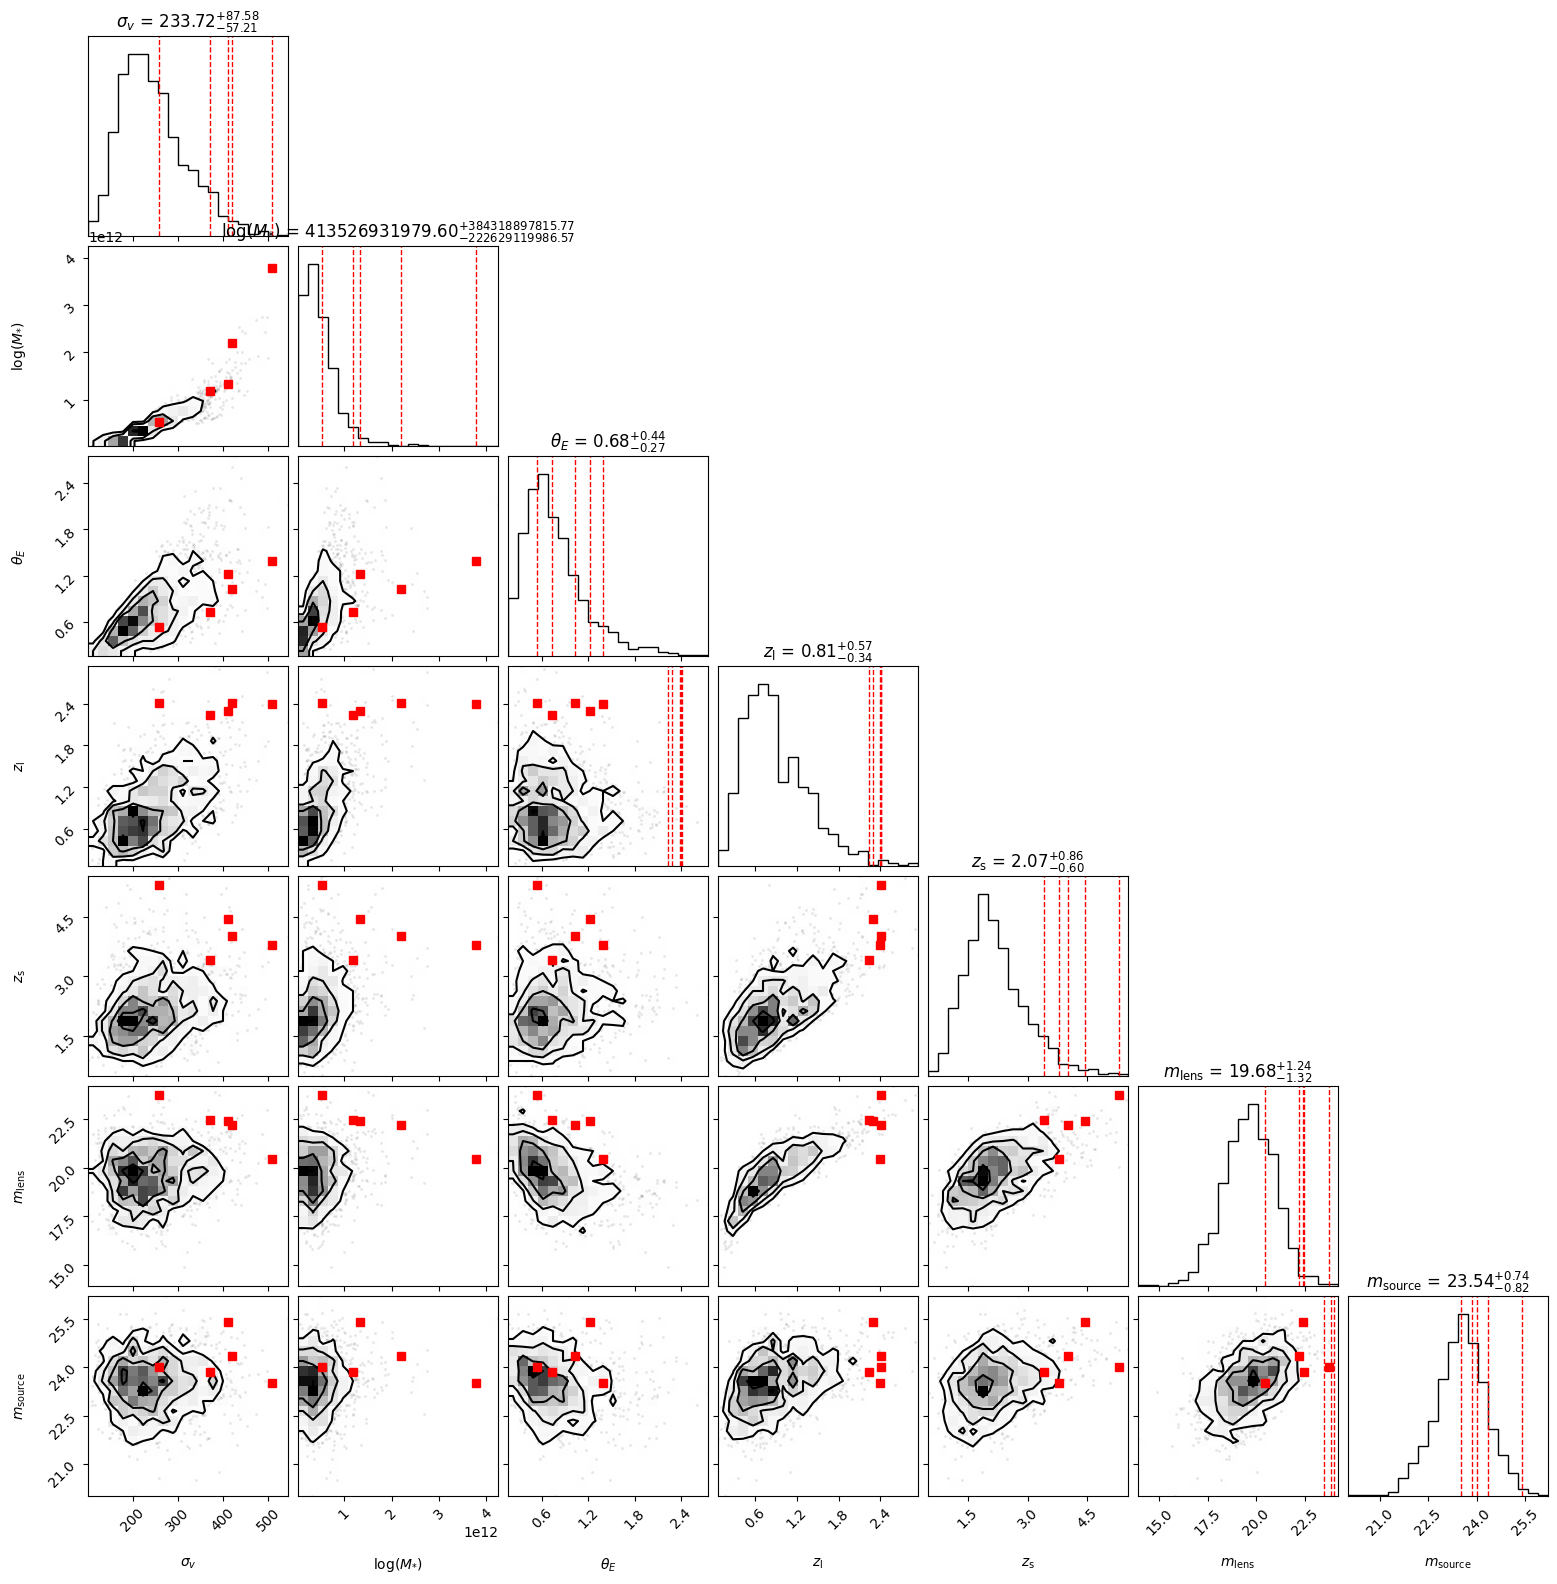

In [13]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)